# Simple House Prices Prediction (Linear Regression)

## Background

House prices is very important aspect to many stakeholders, namely developers, investors, homeowners, and many more (Limsombunchai et al., 2004). Predicting a house prices could improve the efficiency of the real estate market (Limsombunchai et al., 2004). Also, house prices prediction could fill up an important information gap by considering multiple variables that could predict house prices (Limsombunchai et al., 2004).

## Scope

This notebook restricted to:
1. Boston House Prices Dataset (source: https://www.kaggle.com/vikrishnan/boston-house-prices)
2. Using Linear Regression Model

## Purpose

This notebook purpose is creating model by using simple linear regression.

## Data Analysis

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/boston-house-prices/housing.csv


### Read Data

In [2]:
header_names=['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 
              'DIS', 'RAD', 'TAX', 'PTRATION', 'B', 'LSTAT', 'PRICE']
df = pd.read_csv('../input/boston-house-prices/housing.csv', names=header_names, delim_whitespace=True)
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATION,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


### Exploratory Data Analysis

In [3]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATION,B,LSTAT,PRICE
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   CRIM      506 non-null    float64
 1   ZN        506 non-null    float64
 2   INDUS     506 non-null    float64
 3   CHAS      506 non-null    int64  
 4   NOX       506 non-null    float64
 5   RM        506 non-null    float64
 6   AGE       506 non-null    float64
 7   DIS       506 non-null    float64
 8   RAD       506 non-null    int64  
 9   TAX       506 non-null    float64
 10  PTRATION  506 non-null    float64
 11  B         506 non-null    float64
 12  LSTAT     506 non-null    float64
 13  PRICE     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


### Checking Missing Values

In [5]:
missing_values = df.isnull().sum()
missing_values

CRIM        0
ZN          0
INDUS       0
CHAS        0
NOX         0
RM          0
AGE         0
DIS         0
RAD         0
TAX         0
PTRATION    0
B           0
LSTAT       0
PRICE       0
dtype: int64

### Checking Duplicate Rows

In [6]:
total_duplicated = df.duplicated().sum()
total_duplicated

0

### Checking Outliers

In [7]:
'''
Check number of outliers
'''
def check_outlier(data_frame):
    Q1 = data_frame.quantile(0.25) #First Quartile
    Q3 = data_frame.quantile(0.75) #Second Quartile
    IQR = Q3 - Q1 #Interquartile
    
    return (data_frame < (Q1 - 1.5 * IQR)) | (data_frame > (Q3 + 1.5 * IQR))
    
outlier_df = check_outlier(df)
print(outlier_df.sum())

CRIM        66
ZN          68
INDUS        0
CHAS        35
NOX          0
RM          30
AGE          0
DIS          5
RAD          0
TAX          0
PTRATION    15
B           77
LSTAT        7
PRICE       40
dtype: int64


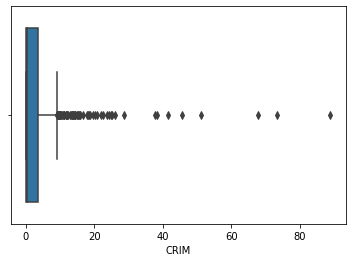

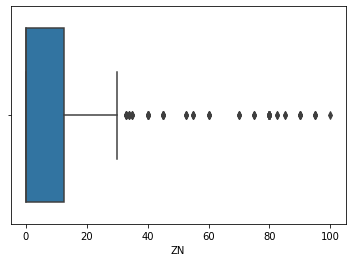

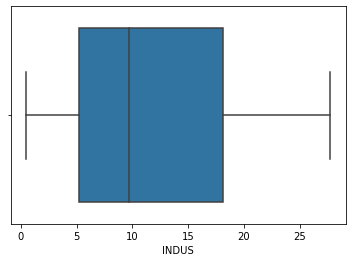

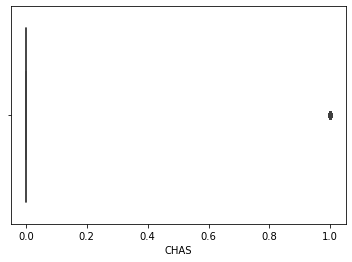

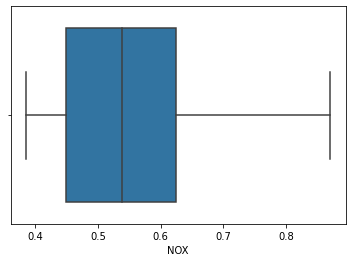

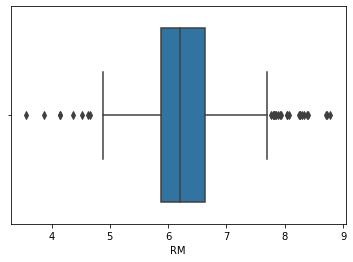

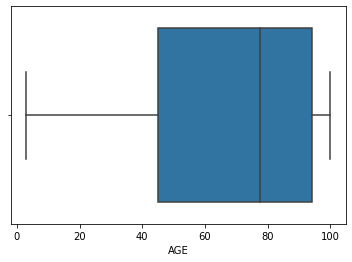

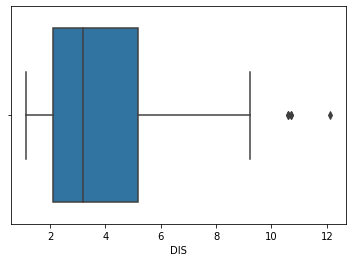

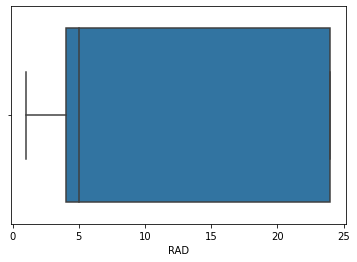

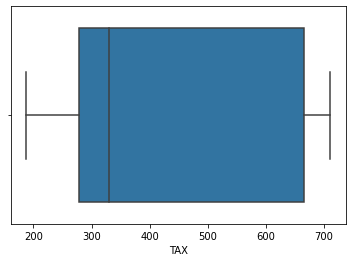

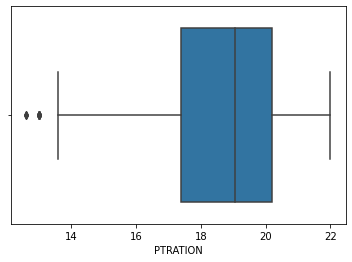

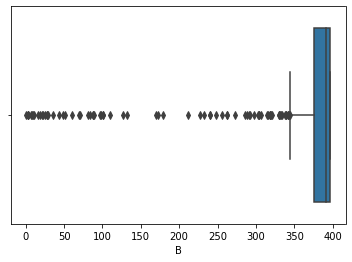

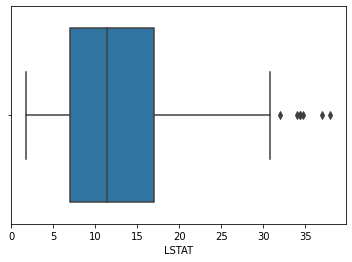

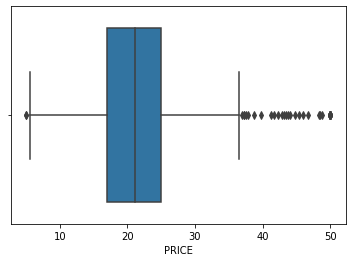

In [8]:
'''
Visualize outliers
'''
def visualize_outliers(data_frame):
    for column_name in data_frame.columns:
        sns.boxplot(x=df[column_name])
        plt.show()

visualize_outliers(df)

In [9]:
'''
Delete data that considered as outlier

Reference: https://towardsdatascience.com/ways-to-detect-and-remove-the-outliers-404d16608dba
'''

df_no_out = df[~outlier_df.any(axis=1)]
df_no_out

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATION,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0


### Separate Feature and Target Label

In [10]:
X = df_no_out.iloc[:, :-1] #Features
y = df_no_out.iloc[:, -1] #Target

In [11]:
X.head(3)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATION,B,LSTAT
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03


In [12]:
y.head(3)

0    24.0
1    21.6
2    34.7
Name: PRICE, dtype: float64

### Split Train and Test Data

In [13]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

print('X Train Shape: ', X_train.shape)
print('X Test Shape: ', X_test.shape)
print('Y Train Shape: ', y_train.shape)
print('Y Test Shape: ', y_test.shape)

X Train Shape:  (214, 13)
X Test Shape:  (54, 13)
Y Train Shape:  (214,)
Y Test Shape:  (54,)


### Train Model

In [14]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression

model_pipeline = Pipeline([
  ('scale', MinMaxScaler()),
  ('regression', LinearRegression())
])

model_pipeline.fit(X_train, y_train)

Pipeline(steps=[('scale', MinMaxScaler()), ('regression', LinearRegression())])

In [15]:
predictions = model_pipeline.predict(X_test)
print(predictions)

[18.45644965 22.48067116 25.26295906 25.28798151 23.13817978 19.81210285
 23.6444482  19.6122227  18.33477919 24.40608366 20.56268623 22.070335
 22.12554916 18.50053928 17.89051014 22.38000459 22.547689   27.07482356
 18.46221105 17.24781522 19.48988017 22.87778928 23.71507395 21.26518363
 19.97060032 17.44264259 15.41301133 24.9277646  21.14199797 25.61312226
 23.47720572 17.23018927 25.56988277 17.84029029 26.46389326 25.55827833
 23.38630436 24.65089274 24.76624774 27.17597013 17.13032164 21.22326874
 21.18907329 19.54897601 20.97034489 19.65750428 19.71668208 31.77034342
 19.49743182 21.85883577 18.81347396 31.91110375 26.21729464 19.64541134]


### Comparison between Actual and Predicted Data

In [16]:
comparison_df = pd.DataFrame({'actual': y_test, 'predicted': predictions})
comparison_df.head(5)

,actual,predicted
462,19.5,18.456450
330,19.8,22.480671
74,24.1,25.262959
42,25.3,25.287982
114,18.5,23.138180


### Model Evaluation

In [17]:
'''
Evaluation using several metrics
'''
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

metrics_mse = mean_squared_error(y_test, predictions)
metrics_rmse = np.sqrt(metrics_mse)
metrics_mae = mean_absolute_error(y_test, predictions)
metrics_r2 = r2_score(y_test, predictions)

evaluation_indicators = ['MSE (Mean Square Error)', 'RMSE (Root Mean Square Error)', 
                        'MAE (Mean Absolute Error)', 'R2 (Coefficient of Determination)']

evaluation_values = [metrics_mse, metrics_rmse, metrics_mae, metrics_r2]

model_evaluation_df = pd.DataFrame({'indicator': evaluation_indicators, 'value': evaluation_values})

model_evaluation_df

,indicator,value
0,MSE (Mean Square Error),7.275711
1,RMSE (Root Mean Square Error),2.697353
2,MAE (Mean Absolute Error),2.076004
3,R2 (Coefficient of Determination),0.562470


## References

Limsombunchai, Visit & Gan, Christopher & Lee, Minsoo. (2004). House Price Prediction: Hedonic Price Model vs. Artificial Neural Network. American Journal of Applied Sciences. 1. 10.3844/ajassp.2004.193.201. 